### Showcase of new InteliAIS algorithm

Due to protection of solutions created for the algorithm, the following document will only showcase its quality of classifiaction. The presentation shows how algorithm behaves when applied to different datasets. 

Mentioned datasets include:
1. Two synthetic datasets
2. All (three) Whisconsin Breast Cancer (WBC) datasets
3. Iris dataset

In [3]:

include("InteliAIS.jl")
include("data_gens/gen_class_ds.jl")

generate_donut_distribution (generic function with 1 method)

### Test with generated distributions

The dataset is balanced, and sampled from Gaussian distributions.

The interesting thing to notice in this example is the way how algorithm creates boundaries near the uncertain regions.
When the data is observed in 3d, it is visible how boundary points wrap around the class and not just spam in these sectors.

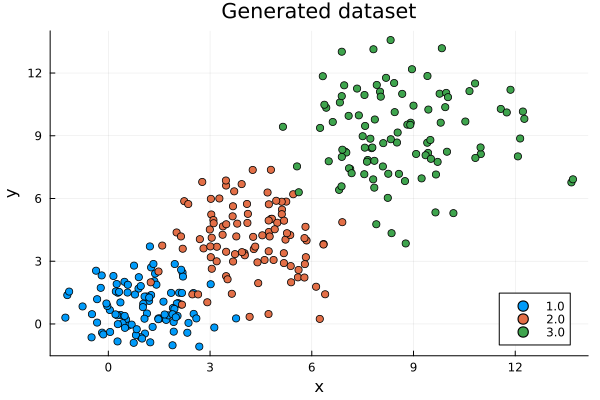

In [93]:
# The training data

data = generate_dataset(3, 300, 3)
X_train = data[:, 1:end-1]
y_train = data[:, end]
p1 = scatter(X_train[:, 1], X_train[:, 2], group=y_train, title="Generated dataset", xlabel="x", ylabel="y", legend=:bottomright)

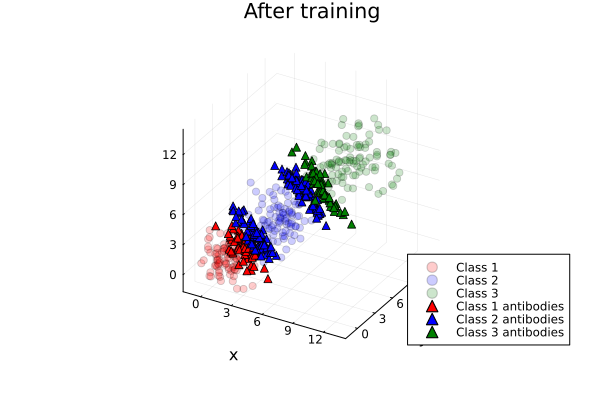

Number of boundry points for class 1: 75
Number of boundry points for class 2: 176
Number of boundry points for class 3: 65


In [94]:
model = inteliais(X_train, y_train, 100, 20, 7)

dict_data = data_to_dict(X_train, y_train)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], dict_data[1][:,3], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[2][:,1], dict_data[2][:,2], dict_data[2][:,3], label="Class 2", color="blue", alpha=0.2, makersize=3)
scatter!(dict_data[3][:,1], dict_data[3][:,2], dict_data[3][:,3], label="Class 3", color="green", alpha=0.2, makersize=3)

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], model[1][3,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], model[2][3,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], model[3][3,:], label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)


println("Number of boundry points for class 1: ", size(model[1])[2])
println("Number of boundry points for class 2: ", size(model[2])[2])
println("Number of boundry points for class 3: ", size(model[3])[2])

In [95]:
data = generate_dataset(3, 100, 3)

X_test = data[:, 1:end-1]
y_test = data[:, end]

results = classify(model, X_test, y_test, 5)
println("Accuracy: ", results[1])
println("F1 Score for class 1: ", results[2])

Accuracy: 0.99
F1 Score for class 1: 0.9855072463768115


## Test with genrerated donut distributions

The classes are even (reminder is distributed), in the shape of rings. Currently only 2 features are available.

Here the flexibility of the algorithm is presented. InteliAIS is not constrained by any specific distribution and can cover highly non-linear patterns.

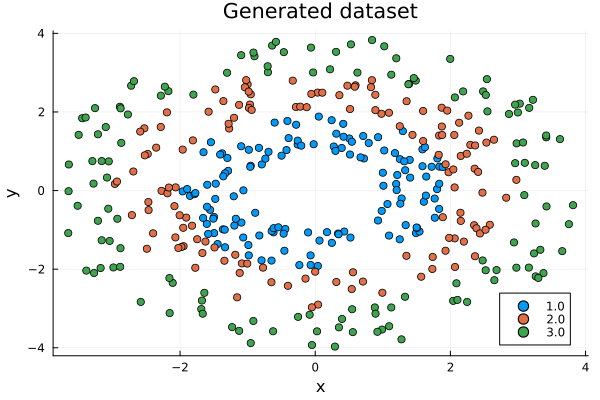

In [208]:
# The training data

data = generate_donut_distribution(3, 400)
X_train = data[:, 1:end-1]
y_train = data[:, end]
p1 = scatter(X_train[:, 1], X_train[:, 2], group=y_train, title="Generated dataset", xlabel="x", ylabel="y", legend=:bottomright)

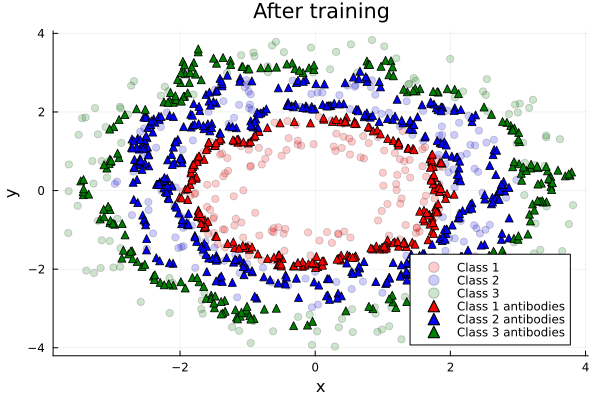

Number of boundry points for class 1: 206
Number of boundry points for class 2: 378
Number of boundry points for class 3: 233


In [217]:
model = inteliais(X_train, y_train, 200, 25, 5)

dict_data = data_to_dict(X_train, y_train)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)
scatter!(dict_data[3][:,1], dict_data[3][:,2], label="Class 3", color="green", alpha=0.2, makersize=3)

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)


println("Number of boundry points for class 1: ", size(model[1])[2])
println("Number of boundry points for class 2: ", size(model[2])[2])
println("Number of boundry points for class 3: ", size(model[3])[2])

In [218]:
data = generate_donut_distribution(3, 100)

X_test = data[:, 1:end-1]
y_test = data[:, end]

results = classify(model, X_test, y_test, 5)
println("Accuracy: ", results[1])
println("F1 Score for class 1: ", results[2])
println("Precision for class 1: ", results[3])
println("Recall for class 1: ", results[4])

Accuracy: 0.93
F1 Score for class 1: 0.9041095890410958
Precision for class 1: 0.825
Recall for class 1: 1.0


## Test with original WBC dataset

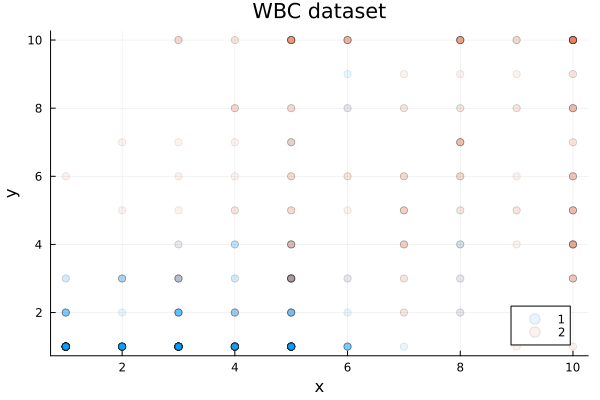

In [162]:
include("benchmarks/wbc/load_data.jl")
include("evaluation.jl")
dataset, labels = load_wbc_data()
train_data, train_labels, test_data, test_labels = test_train_split(dataset, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.1)



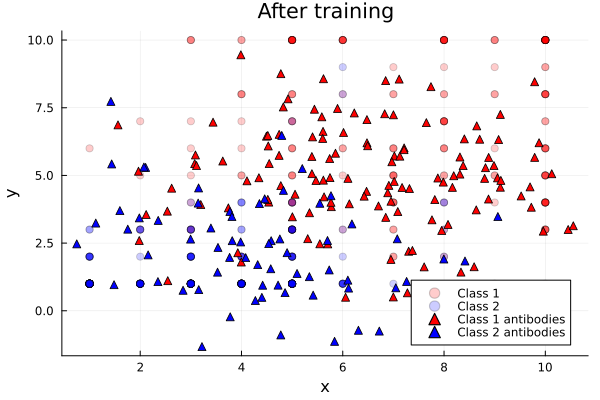

In [165]:

model = inteliais(train_data, train_labels, 15, 50, 7)

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [166]:

results = classify(model, test_data, test_labels, 5)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])

Accuracy: 0.9708029197080292
F1 Score: 0.9761904761904762
Precision: 0.9647058823529412
Recall: 0.9879518072289156


## Test with diagnostic WBC dataset

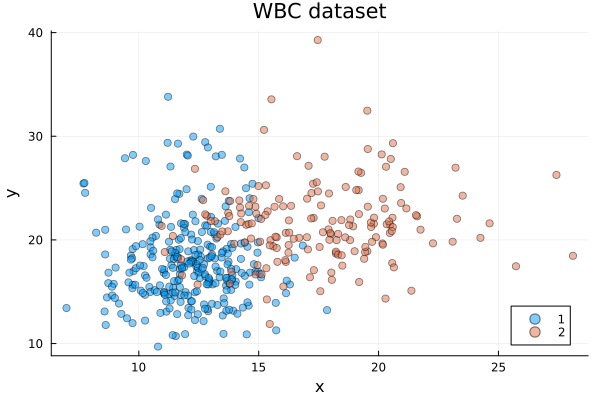

In [167]:

dataset, labels = load_wbc_diagnostics()
train_data, train_labels, test_data, test_labels = test_train_split(dataset, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)

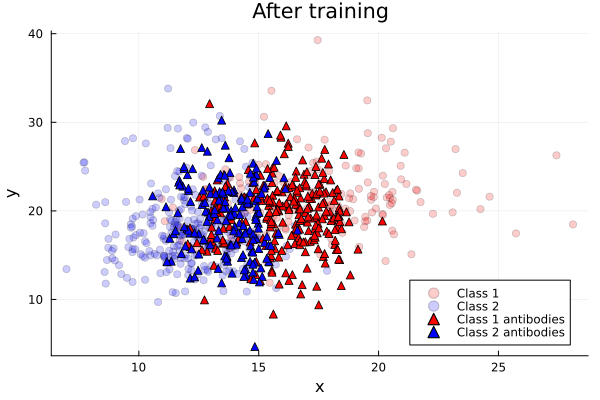

In [168]:
model = inteliais(train_data, train_labels, 150, 20, 7)

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [169]:
results = classify(model, test_data, test_labels, 5)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])

Accuracy: 0.956140350877193
F1 Score: 0.9640287769784173
Precision: 0.9710144927536232
Recall: 0.9571428571428572


## Test with prognostic WBC dataset

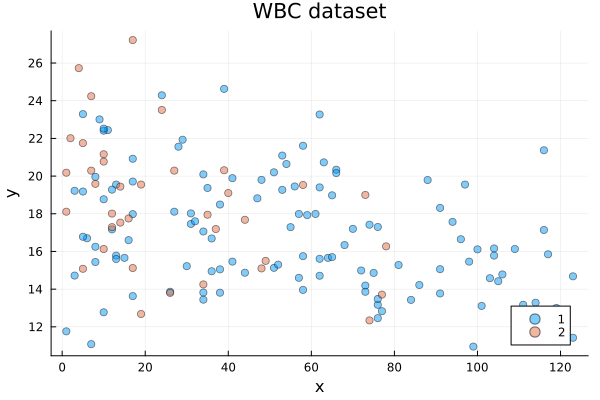

In [170]:
data, labels = load_wbc_prognostics()
train_data, train_labels, test_data, test_labels = test_train_split(data, labels, 0.8)

p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="WBC dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)

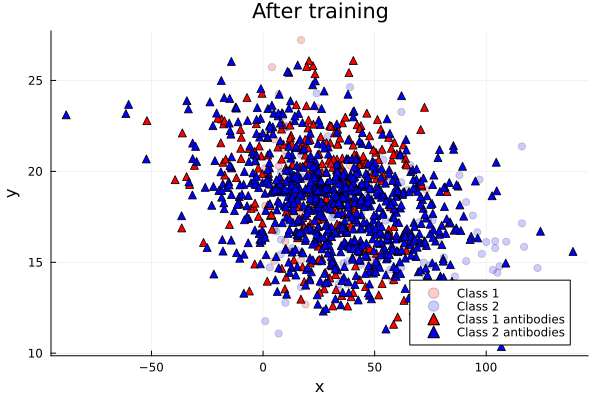

In [206]:

model = inteliais(train_data, train_labels, 100, 20,  3)

dict_data = data_to_dict(train_data, train_labels)

p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[2][:,1], dict_data[2][:,2], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")
scatter!(dict_data[1][:,1], dict_data[1][:,2], label="Class 2", color="blue", alpha=0.2, makersize=3)

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], label="Class 2 antibodies", color="blue", shape=:utriangle)
end

display(p1)

In [207]:

results = classify(model, test_data, test_labels, 5)
println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])
println("Balanced accuracy: ", results[5])

Accuracy: 0.717948717948718
F1 Score: 0.819672131147541
Precision: 0.8064516129032258
Recall: 0.8333333333333334
Balanced accuracy: 0.5833333333333334


## Iris

Test performed with 60% of data used as the training set.


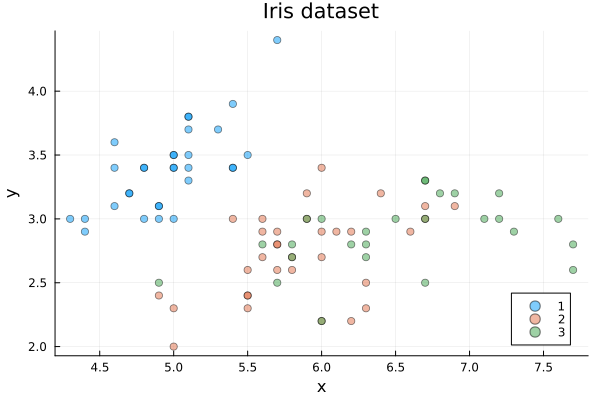

In [85]:
include("benchmarks/iris/load_iris.jl")

data, labels = load_iris_data()

train_data, train_labels, test_data, test_labels = test_train_split(data, labels, 0.6)
model = inteliais(train_data, train_labels, 100, 25,  10)  # 0.5 random_ratio, 2 iterations, 5 neighbors
p1 = scatter(train_data[:, 1], train_data[:, 2], group=train_labels, title="Iris dataset", xlabel="x", ylabel="y", legend=:bottomright, alpha=0.5)



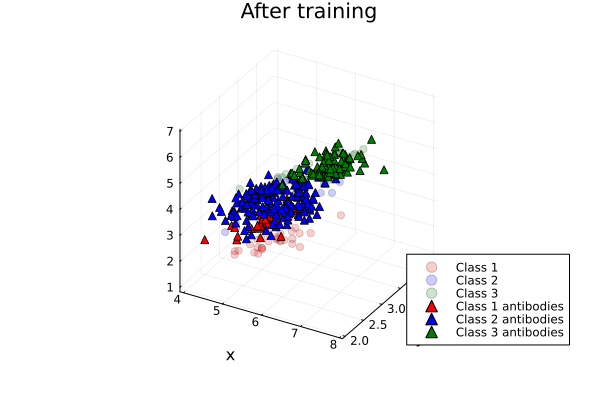

In [86]:

dict_data = data_to_dict(train_data, train_labels)


p1 = scatter(legend=:bottomright, size=(600, 400), title="After training")

scatter!(dict_data[1][:,1], dict_data[1][:,2], dict_data[1][:,3], label="Class 1", color="red", alpha=0.2, makersize=3, xlabel="x", ylabel="y")

scatter!(dict_data[2][:,1], dict_data[2][:,2], dict_data[2][:,3], label="Class 2", color="blue", alpha=0.2, makersize=3)

scatter!(dict_data[3][:,1], dict_data[3][:,2], dict_data[3][:,3],label="Class 3", color="green", alpha=0.2, makersize=3)

if length(model[1]) != 0
    scatter!(model[1][1,:], model[1][2,:], model[1][3,:], label="Class 1 antibodies", color="red", shape=:utriangle)
end

if length(model[2]) != 0
    scatter!(model[2][1,:], model[2][2,:], model[2][3,:],label="Class 2 antibodies", color="blue", shape=:utriangle)
end

if length(model[3]) != 0
    scatter!(model[3][1,:], model[3][2,:], model[3][3,:],label="Class 3 antibodies", color="green", shape=:utriangle)
end

display(p1)

In [87]:

results = classify(model, test_data, test_labels, 7)

println("Accuracy: ", results[1])
println("F1 Score: ", results[2])
println("Precision: ", results[3])
println("Recall: ", results[4])


Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
